This notebook contains some economic applications using the methods in the previous notebooks.

# Monopoly pricing

A monopolist face the demand function
$$Q(p)=1-p^\alpha$$
if $p^\alpha<1$ and 0 else. That is, $Q(p)=\max (0,1-p^\alpha)$. The monopolist has costs 
$$c(q)=q^2$$
where $q$ is the produced quantity. What is the profit maximizing price? How does it depend on the demand parameter $\alpha$?

First, we set up the functions and load the Plots and Optim packages which we will use in a second:

In [1]:
using Plots
Plots.pyplot()
using Optim

#demand function
function q(p,alpha)
    return max(0,1-p^alpha) #max(a,b) returns the higher of the two number a and b
end

#cost function
c(q)=q^2

#profit function
pi(p,alpha) = p*q(p,alpha)-c(q(p,alpha))

pi (generic function with 1 method)

Note that the profit depends on the parameter $\alpha$ because the demand function does. To get a better idea about the demand function I am next going to plot the demand function for three different values of $\alpha$, namely 0.5, 1.0 and 2.0.


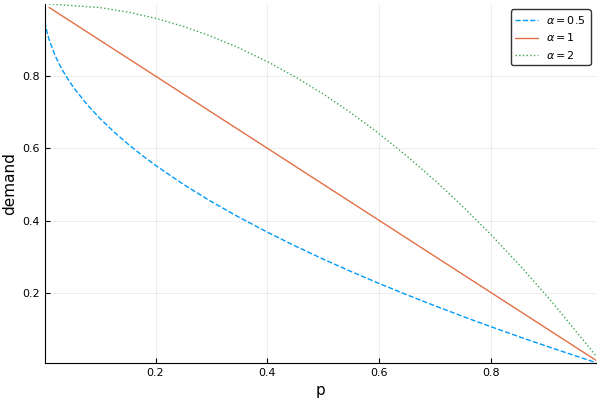

In [5]:
using LaTeXStrings
plot([p->q(p,0.5), p->q(p,1.0), p->q(p,2.0)],0.0,1.0,linestyle=[:dash :solid :dot],xlabel="p",ylabel="demand",label=[L"\alpha=0.5" L"\alpha=1" L"\alpha=2"])

Now we turn to maximizing the monopolist's profit. We us Optim for this but Optima can only maximize profits for a given level of $\alpha$. Therefore, I will write a function "maximizePi" that takes an argument $\alpha$ and then maximizes profits given this $\alpha$.

In [18]:
function maximizePi(alpha)
    pStar = optimize(p->-pi(p,alpha),0.0,1.0)
    return pStar
end

maximizePi (generic function with 1 method)

What happens inside the maximizePi function? Say you call the function with 0.5, i.e. "maximizePi(0.5)". Julia will then execute the code inside the function but wherever the code says alpha julia will put 0.5. The first line inside function becomes therefore "pStar = optimize(p->-pi(p,0.5),0.0,1.0)". This means julia creates a variable pStar inside the function and assigns to it the output of "optimize(p->-pi(p,0.5),0.0,1.0)". Recall that optimize takes three arguments: first the function to be minimized, second a lower bound for the variable over which it maximizes and third an upper bound for this variable. We use the anonymous function trick from notebook 4 here to create a function on the spot with "p->-pi(p,0.5)", that is, this function assigns to every p minus the value of pi(p,0.5). Recall that optimize minimizes the function and as we want to maximize we take the negative of the profit function (minimizing -profits leads to the same optimizer as maximizing profits). I have chosen 0.0 (1.0) as lower (upper) bound for p because from the plot of the demand function it is clear that any higher price than 1.0 will lead to zero demand and therefore zero profits.
The first line within maximizePi will therefore minimize -pi given the alpha we put into the function and restricting the price to be between 0.0 and 1.0. This output is assigned to the variable pStar. The second line simply returns this output.

Let us try what is the optimal price if $\alpha=1.0$ and demand is linear.

In [24]:
maximizePi(1.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 1.000000]
 * Minimizer: 7.500000e-01
 * Minimum: -1.250000e-01
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6

The result is "7.500000e-01". You have to know that e-01 means $*10^{-1}$, i.e. divide by 10. The optimal price is therefore 0.75.

Now let us plot the optimal price for a range of $\alpha$ values. You might try this first and you might be anoyed that it does not work:

In [31]:
plot(maximizePi,0.5,2.0,xlabel=L"\alpha",ylabel=L"$p^*$",ylim=(0.0,1.0),label="monopoly price")

LoadError: [91mMethodError: no method matching isfinite(::Optim.UnivariateOptimizationResults{Float64,Float64,Float64,Float64,Optim.Brent,Optim.Brent})[0m
Closest candidates are:
  isfinite([91m::BigFloat[39m) at mpfr.jl:831
  isfinite([91m::Float16[39m) at float.jl:539
  isfinite([91m::AbstractFloat[39m) at float.jl:538
  ...[39m

The problem is that the output of maximizePi is currently the whole output of optimize. This is not only the optimal price but all kind of information on convergence of the algorithm and other stuff (see the output of maximizePi(1.0) above). Given all this output, Plots simply doe snto know what it should plot!

We will resolve this by changing the maximizePi function such that it only spits out the optimal price and not all the other information. I call this function maximizePiPlot.


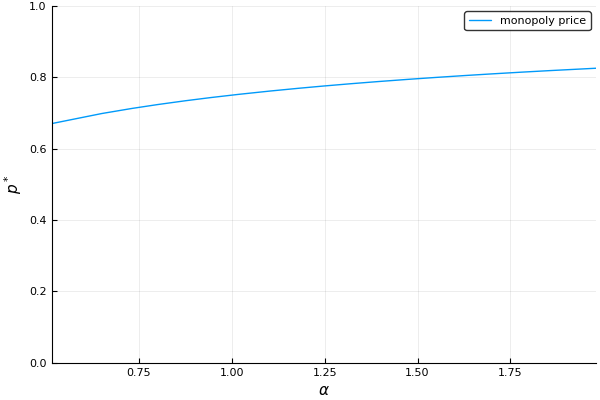

In [30]:
function maximizePiPlot(alpha)
    pStar = optimize(p->-pi(p,alpha),0.0,1.0).minimizer
    return pStar
end
plot(maximizePiPlot,0.5,2.0,xlabel=L"\alpha",ylabel=L"$p^*$",ylim=(0.0,1.0),label="monopoly price")

Looks like the monopoly price is concavely increasing in $\alpha$.

The big difference between maxmizePi and maximizePiPlot is that I added ".minimizer" to the optimize command. "optimize(p->-pi(p,alpha),0.0,1.0).minimizer" is the price minimizing minus profits (and all the other information like algorithm convergence and value of the minimum etc. is no longer returned).

You can see this also when evaluating maximizePiPlot on its own: Only the optimal price is returned.

In [27]:
maximizePiPlot(1.0)

0.7499999999999999

# Cournot Equilibrium

Here we will calculate the Cournot equilibrium with three firms that have linear but heterogenous marginal costs of production. More precisely, three firms set quantities $q_i$ leading to the market quantity $Q=q_1+q_2+q_3$ and the resulting price $P(Q)=max(0,1-Q)$. Firm $i$'s profit equals $(P(Q)-c_i)*q_i$ where $c_i$ is the firm specific marginal costs or production. Clearly, this model could be solved by hand but it is a nice illustration of how to set up best response functions and derive an equilibrium from there.

First, we set up the demand and the best response function of firm $i$.

In [1]:
using Optim

P(Q)=max(0.0,1.0-Q)

function bestResponse(qOther,ci)
    minusPi(qi)=-(P(qOther+qi)-ci)*qi
    br = optimize(minusPi,0.0,1.0).minimizer
    return br
end

bestResponse (generic function with 1 method)

To recap: The best response function takes the quantity of the other players and firm $i$'s own marginal costs as arguments. In the bestResponse function I first set up a function minusPi which is the negative of firm $i$'s profit. This function depends only on $q_i$ because we now take qOther as given. Then the best response quantity is calculated using the optimizes command. We end this command with ".minimizer" in order to get only the best respoonse quantity and not all the  information about the minimum. convergence etc. Finally, this best response quantity is returned.

An equilibrium is simply a situation where all firms play best response. Put differently, best response to the other's quantities minus your own quantity equals zero. This is a system of equations characterizing an equilibrium. We will use the Roots package to solve this system of equations and thereby obtaining the equilibrium.

In [8]:
using NLsolve

function bestResponseMinusQ(q,c1,c2,c3)
    br1 = bestResponse(q[2]+q[3],c1)
    br2 = bestResponse(q[1]+q[3],c2)
    br3 = bestResponse(q[1]+q[2],c3)
    return [br1-q[1],br2-q[2],br3-q[3]]
end

function equilibrium(c1,c2,c3)
    function brMinQInPlace!(q,brQminQ)
        brs = bestResponseMinusQ(q,c1,c2,c3)
        brQminQ[1]=brs[1]
        brQminQ[2]=brs[2]
        brQminQ[3]=brs[3]
    end
    result = nlsolve(brMinQInPlace!,[0.2,0.2,0.2])
    return result
end

equilibrium(0.2,0.3,0.4)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.2, 0.2, 0.2]
 * Zero: [0.275, 0.175, 0.075]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4

The ouput field "Zero" gives the equilibrium quantities of the three firms. As expected, the equilibrium quantity of the low cost firm is higher than then quantities of the firms with higher costs.